Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import sklearn
import sklearn.model_selection
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [72]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,52.906040,133.036242,244.747651,0.167785,140.209396,0.902953,0.477852,0.244295,0.755705,0.496644,...,0.225503,0.055034,0.236242,0.597315,0.166443,0.614765,0.385235,0.057718,0.475168,0.467114
std,9.489625,17.290451,59.113689,0.373927,24.536108,1.072953,0.499845,0.429957,0.429957,0.500325,...,0.418194,0.228199,0.425058,0.490768,0.372728,0.486978,0.486978,0.233366,0.499718,0.499253
min,28.000000,92.000000,85.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,208.000000,0.000000,122.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(data.Age.unique()) 
print(data.ChestPainType.unique())  
print(data.RestingBP.unique()) 
print(data.Cholesterol.unique()) 
print(data.FastingBS.unique()) 
print(data.RestingECG.unique()) 
print(data.MaxHR.unique()) 
print(data.ExerciseAngina.unique())
print(data.Oldpeak.unique()) 
print(data.ST_Slope.unique()) 

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
['ATA' 'NAP' 'ASY' 'TA']
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 

#Exploring Data Analysis

In [7]:
colors = ['#FFFFFF', '#F9B1B8', '#EE4355', '#B60618', '#820815', '#000000']
corr = data.corr()
fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale=colors,
                                 text = corr.round(2), texttemplate="%{text}"
                                 )
                )
fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  width=600, height=600
                  )
fig.show()

In [8]:
#upraviť
fig = px.histogram(data, x="HeartDisease")
fig.update_layout(title='Heart Disease Distribution')
fig.show()

In [9]:
fig = px.pie(data, names='HeartDisease')
fig.update_layout(title='% of Heart Disease')
fig.show()

In [10]:
fig = px.histogram(data, x="Sex")
fig.update_layout(title='Gender Distribution')
fig.show()

In [11]:
fig = px.histogram(data, x="Sex",color='HeartDisease', barmode='group')
#fig.update_layout(title='Gender Distribution')
fig.show()

In [12]:
fig = px.histogram(data, x="Age")
fig.update_layout(title='Distribution of Age')
fig.show()

In [13]:
fig = px.histogram(data, x="Age", color="Sex")
#fig.update_layout(title='Distribution of Age')
fig.show()

In [14]:
fig = px.histogram(data, x="Age", color="HeartDisease", marginal="box",
                         hover_data=data.columns)
#fig.update_layout(title='Distribution of Age')
fig.show()

In [15]:
fig = px.histogram(data, x="ChestPainType", category_orders=dict(pain=["TA", "ATA", "NAP", "ASY"]))
fig.show()

*   ATA: Atypical Angina
*   NAP: Non-Anginal Pain
*   ASY: Asymptomatic
*   TA: Typical Angina









In [16]:
fig = px.histogram(data, x="ChestPainType",color='HeartDisease', barmode='group')
fig.show()

In [17]:
fig = px.histogram(data, x="RestingBP", marginal="box")
fig.update_layout(title="Distribution of RestingBP")
fig.show()

In [18]:
fig = px.scatter(data, x="Age", y="RestingBP", color=data["HeartDisease"].replace({0:"No", 1:"Yes"}), opacity=0.5)
fig.update_layout(title="Age VS RestingBP")
fig.show()

# Preprocesing

In [19]:
data = data[data['RestingBP'] > 0]
data = data[data['Cholesterol'] > 0]
data = data[data['Oldpeak'] >= 0]

In [20]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             745 non-null    int64  
 1   Sex             745 non-null    object 
 2   ChestPainType   745 non-null    object 
 3   RestingBP       745 non-null    int64  
 4   Cholesterol     745 non-null    int64  
 5   FastingBS       745 non-null    int64  
 6   RestingECG      745 non-null    object 
 7   MaxHR           745 non-null    int64  
 8   ExerciseAngina  745 non-null    object 
 9   Oldpeak         745 non-null    float64
 10  ST_Slope        745 non-null    object 
 11  HeartDisease    745 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.7+ KB


In [22]:
numerical_cols = data[["Age","RestingBP","Cholesterol","FastingBS", "MaxHR","Oldpeak", "HeartDisease"]]
categorical_cols = data[["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]]
for col in categorical_cols:
    categorical_cols = pd.get_dummies(categorical_cols, columns=[col], prefix=[col])
    
data = pd.concat([numerical_cols,categorical_cols], axis=1)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                745 non-null    int64  
 1   RestingBP          745 non-null    int64  
 2   Cholesterol        745 non-null    int64  
 3   FastingBS          745 non-null    int64  
 4   MaxHR              745 non-null    int64  
 5   Oldpeak            745 non-null    float64
 6   HeartDisease       745 non-null    int64  
 7   Sex_F              745 non-null    uint8  
 8   Sex_M              745 non-null    uint8  
 9   ChestPainType_ASY  745 non-null    uint8  
 10  ChestPainType_ATA  745 non-null    uint8  
 11  ChestPainType_NAP  745 non-null    uint8  
 12  ChestPainType_TA   745 non-null    uint8  
 13  RestingECG_LVH     745 non-null    uint8  
 14  RestingECG_Normal  745 non-null    uint8  
 15  RestingECG_ST      745 non-null    uint8  
 16  ExerciseAngina_N   745 non

In [24]:
X = data.drop(["HeartDisease"], axis=1)
y = data["HeartDisease"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.20, random_state=42)

numerical_features = numerical_cols.columns.to_list()
numerical_features.remove("HeartDisease")

print(X_train.shape)
print(X_test.shape)

(596, 20)
(149, 20)


In [43]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [73]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Bagging Classifier', BaggingClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(("Light GBM Classifier", LGBMClassifier()))

for name, model1 in models:
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    score = sklearn.metrics.accuracy_score(y_test, y_pred)
    print(name, "Score: {:.8f}".format(score))

Logistic Regression Score: 0.89261745
Gaussian NB Score: 0.87919463
KNN Score: 0.87919463
SVC Score: 0.89932886
Decision Tree Classifier Score: 0.77181208
Random Forest Classifier Score: 0.89261745
Bagging Classifier Score: 0.86577181
Gradient Boosting Classifier Score: 0.89261745
Light GBM Classifier Score: 0.87248322


In [54]:
def model_train(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    print(plot_confusion_matrix(model,X_test_scaled,y_test))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89        69
           1       0.94      0.85      0.89        80

    accuracy                           0.89       149
   macro avg       0.89      0.90      0.89       149
weighted avg       0.90      0.89      0.89       149



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



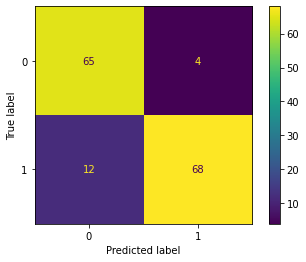

In [74]:
model_train(LogisticRegression())

In [68]:
param_grid={'C':np.logspace(-3,3,7),'penalty':['l1','l2']}
grid=GridSearchCV(param_grid=param_grid, estimator=LogisticRegression(), scoring='accuracy')
grid.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [69]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        69
           1       0.94      0.84      0.89        80

    accuracy                           0.89       149
   macro avg       0.89      0.89      0.89       149
weighted avg       0.89      0.89      0.89       149



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



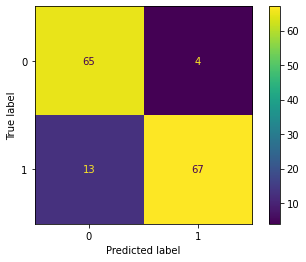

In [61]:
grid.predict(X_test_scaled)
y_pred=grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(plot_confusion_matrix(grid,X_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        69
           1       0.94      0.82      0.88        80

    accuracy                           0.88       149
   macro avg       0.88      0.88      0.88       149
weighted avg       0.89      0.88      0.88       149



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



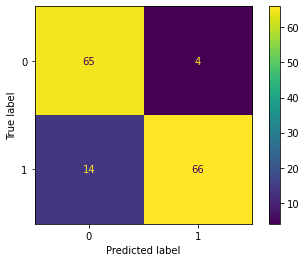

In [62]:
model_train(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        69
           1       0.95      0.88      0.91        80

    accuracy                           0.91       149
   macro avg       0.91      0.91      0.91       149
weighted avg       0.91      0.91      0.91       149



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



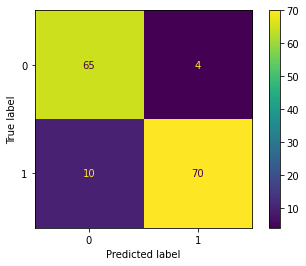

In [63]:
param_grid={'n_estimators':[200,300,400,500]
           ,'max_features':['auto','sqrt','log2']
           ,'max_depth':[4,5,6,7,8]
           ,'criterion':['gini','entropy']}

grid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
y_pred=grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(plot_confusion_matrix(grid, X_test_scaled, y_test))

In [64]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 300}

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        69
           1       0.94      0.82      0.88        80

    accuracy                           0.88       149
   macro avg       0.88      0.88      0.88       149
weighted avg       0.89      0.88      0.88       149



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



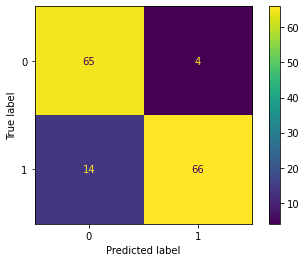

In [67]:
model_train(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        69
           1       0.94      0.84      0.89        80

    accuracy                           0.89       149
   macro avg       0.89      0.89      0.89       149
weighted avg       0.89      0.89      0.89       149



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



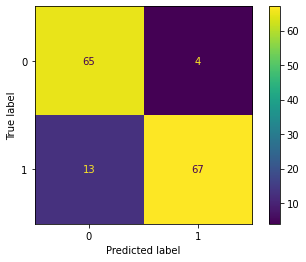

In [70]:
param_grid={ "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

grid=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
y_pred=grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(plot_confusion_matrix(grid, X_test_scaled, y_test))